In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chronic-kidney-disease-ehrs-abu-dhabi/ChronicKidneyDisease_EHRs_from_AbuDhabi.csv


/kaggle/input/chronic-kidney-disease-ehrs-abu-dhabi/ChronicKidneyDisease_EHRs_from_AbuDhabi.csv
Dataset shape: (491, 22)
First few rows of the dataset:
    Sex  AgeBaseline  HistoryDiabetes  HistoryCHD  HistoryVascular  \
0    0           64                0           0                0   
1    0           52                0           0                0   
2    0           56                0           0                0   
3    0           58                0           0                0   
4    0           63                1           0                0   

   HistorySmoking  HistoryHTN   HistoryDLD  HistoryObesity  DLDmeds  ...  \
0               0            1           1               1        1  ...   
1               0            1           1               1        0  ...   
2               0            1           1               1        1  ...   
3               0            0           1               1        1  ...   
4               0            1           1          

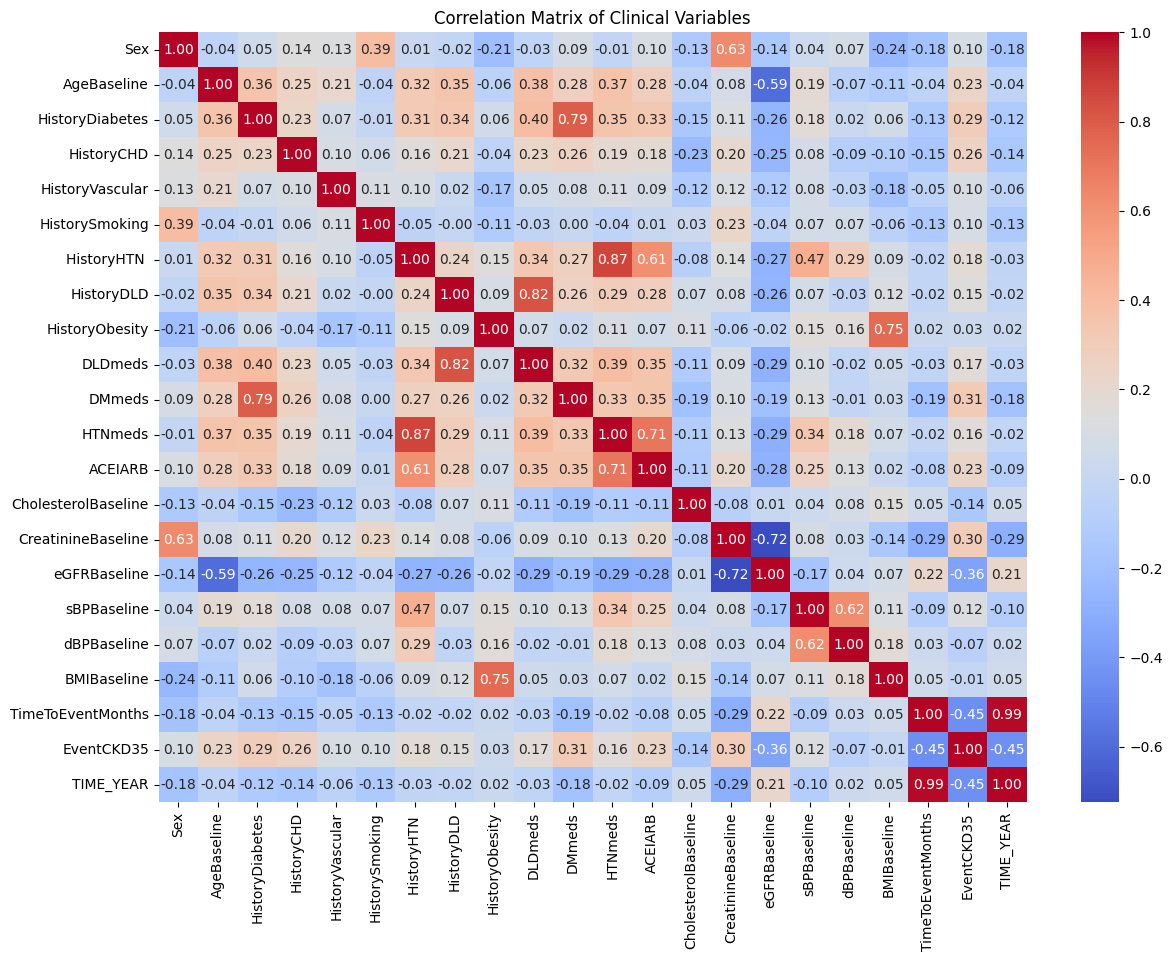

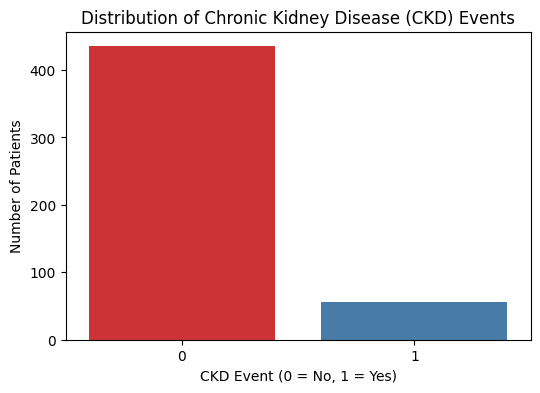

Logistic Regression - Accuracy: 0.9191919191919192 AUC-ROC: 0.8898467432950191
Random Forest - Accuracy: 0.9191919191919192 AUC-ROC: 0.8721264367816092
Neural Network - Accuracy: 0.9090909090909091 AUC-ROC: 0.7988505747126436


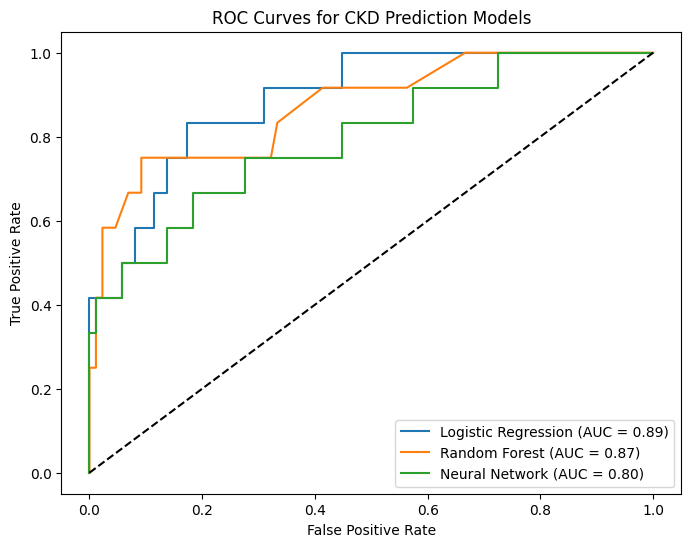

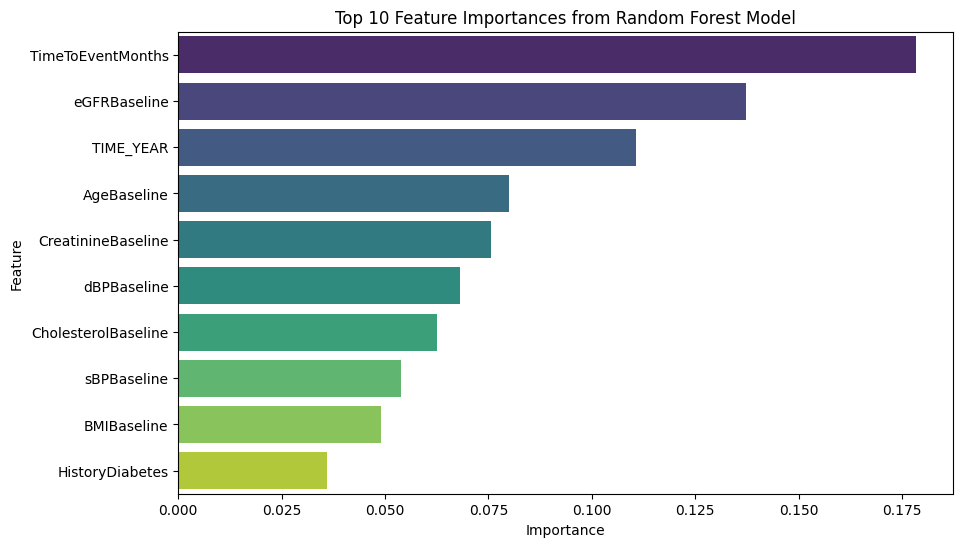

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96        87
           1       0.83      0.42      0.56        12

    accuracy                           0.92        99
   macro avg       0.88      0.70      0.76        99
weighted avg       0.91      0.92      0.91        99



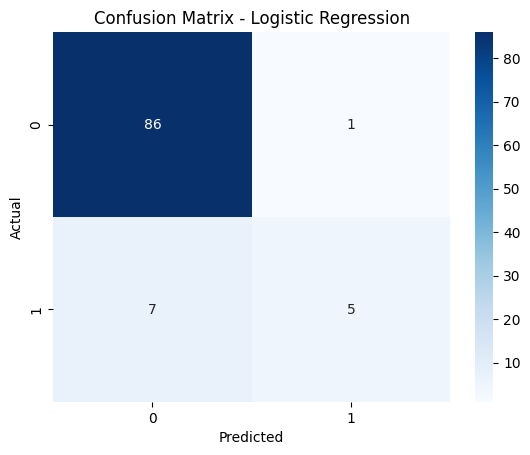

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load the dataset from the Kaggle input directory
file_path = "/kaggle/input/chronic-kidney-disease-ehrs-abu-dhabi/ChronicKidneyDisease_EHRs_from_AbuDhabi.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("First few rows of the dataset:\n", df.head())
print("Data types:\n", df.dtypes)

# Check for missing values
print("Missing values in the dataset:\n", df.isnull().sum())

# Perform Exploratory Data Analysis (EDA)
# Correlation matrix
plt.figure(figsize=(14,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Clinical Variables")
plt.show()

# Distribution of CKD events in the dataset
plt.figure(figsize=(6,4))
sns.countplot(x='EventCKD35', data=df, palette='Set1')
plt.title('Distribution of Chronic Kidney Disease (CKD) Events')
plt.xlabel('CKD Event (0 = No, 1 = Yes)')
plt.ylabel('Number of Patients')
plt.show()

# Data Preprocessing
X = df.drop('EventCKD35', axis=1)  # Features
y = df['EventCKD35']  # Target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training and Evaluation
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Neural Network (MLPClassifier)
nn_model = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
nn_model.fit(X_train_scaled, y_train)
y_pred_nn = nn_model.predict(X_test_scaled)
y_prob_nn = nn_model.predict_proba(X_test_scaled)[:, 1]

# Calculate accuracy and AUC-ROC for each model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_nn = accuracy_score(y_test, y_pred_nn)

auc_lr = roc_auc_score(y_test, y_prob_lr)
auc_rf = roc_auc_score(y_test, y_prob_rf)
auc_nn = roc_auc_score(y_test, y_prob_nn)

print("Logistic Regression - Accuracy:", accuracy_lr, "AUC-ROC:", auc_lr)
print("Random Forest - Accuracy:", accuracy_rf, "AUC-ROC:", auc_rf)
print("Neural Network - Accuracy:", accuracy_nn, "AUC-ROC:", auc_nn)

# Plot ROC Curves
plt.figure(figsize=(8,6))
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_prob_nn)

plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = {:.2f})'.format(auc_lr))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(auc_rf))
plt.plot(fpr_nn, tpr_nn, label='Neural Network (AUC = {:.2f})'.format(auc_nn))

plt.plot([0,1], [0,1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for CKD Prediction Models')
plt.legend(loc='lower right')
plt.show()

# Feature Importance (Random Forest)
feature_importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting top 10 feature importances
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances from Random Forest Model')
plt.show()

# Classification Report for Logistic Regression
print("Classification Report for Logistic Regression:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


/kaggle/input/chronic-kidney-disease-ehrs-abu-dhabi/ChronicKidneyDisease_EHRs_from_AbuDhabi.csv
Dataset shape: (491, 22)
First few rows of the dataset:
    Sex  AgeBaseline  HistoryDiabetes  HistoryCHD  HistoryVascular  \
0    0           64                0           0                0   
1    0           52                0           0                0   
2    0           56                0           0                0   
3    0           58                0           0                0   
4    0           63                1           0                0   

   HistorySmoking  HistoryHTN   HistoryDLD  HistoryObesity  DLDmeds  ...  \
0               0            1           1               1        1  ...   
1               0            1           1               1        0  ...   
2               0            1           1               1        1  ...   
3               0            0           1               1        1  ...   
4               0            1           1          

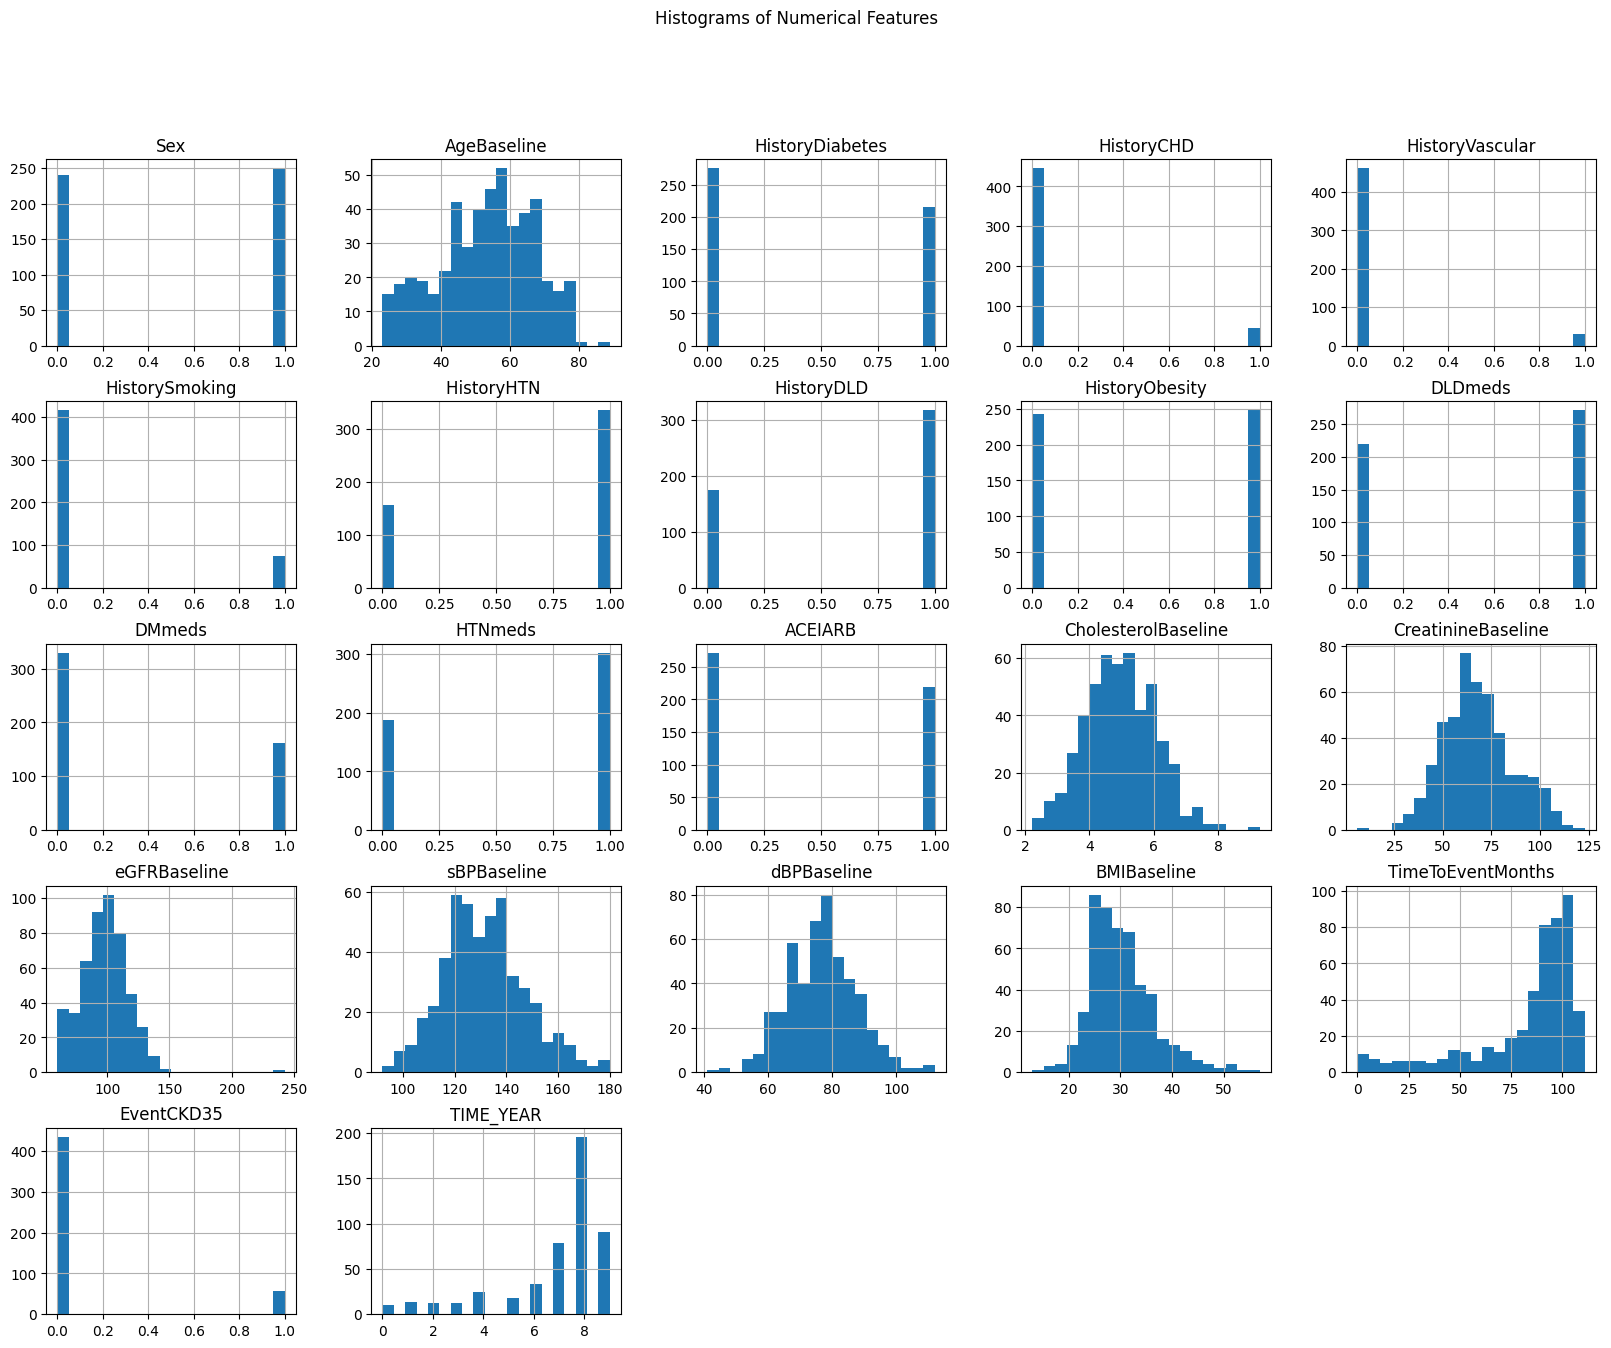

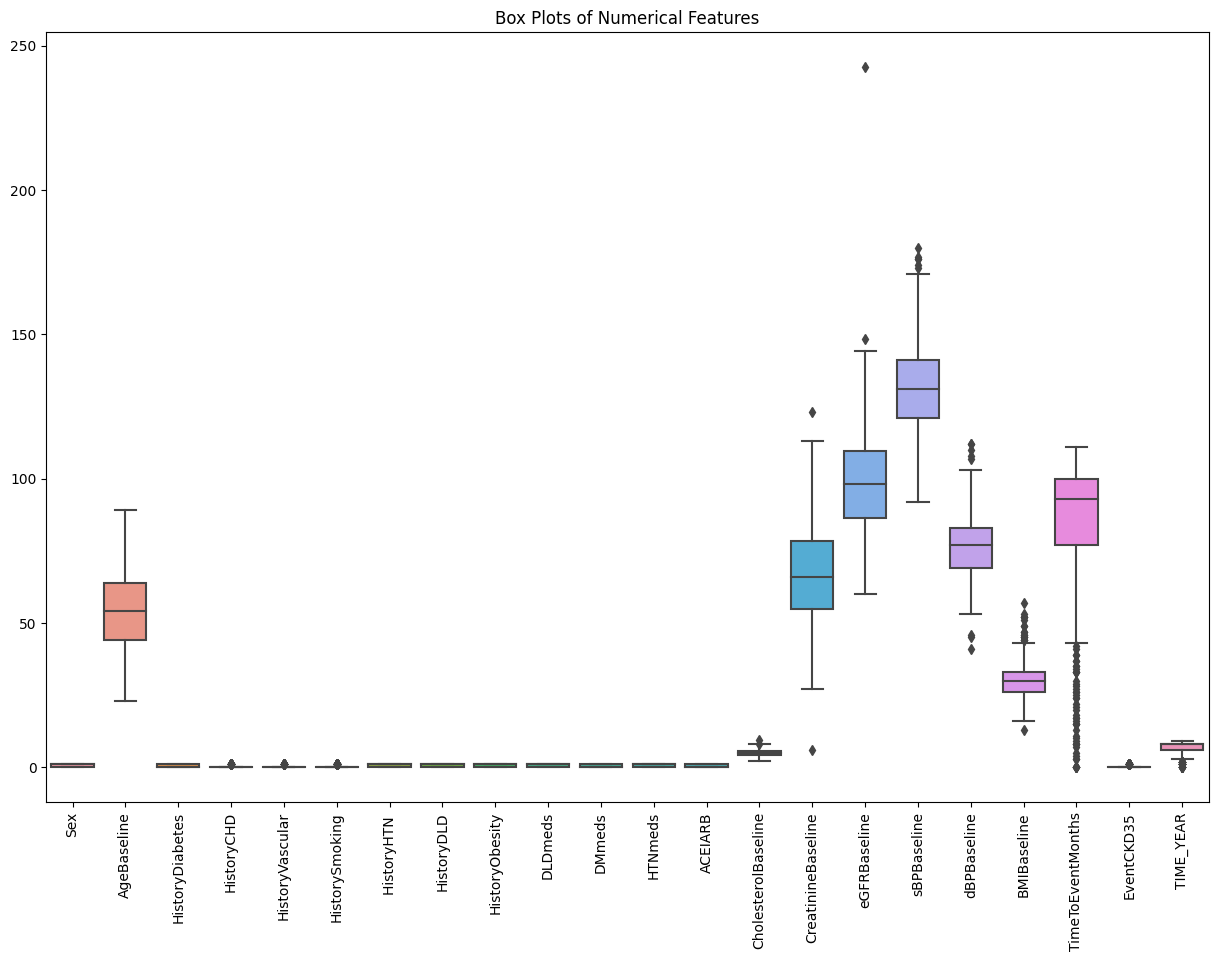

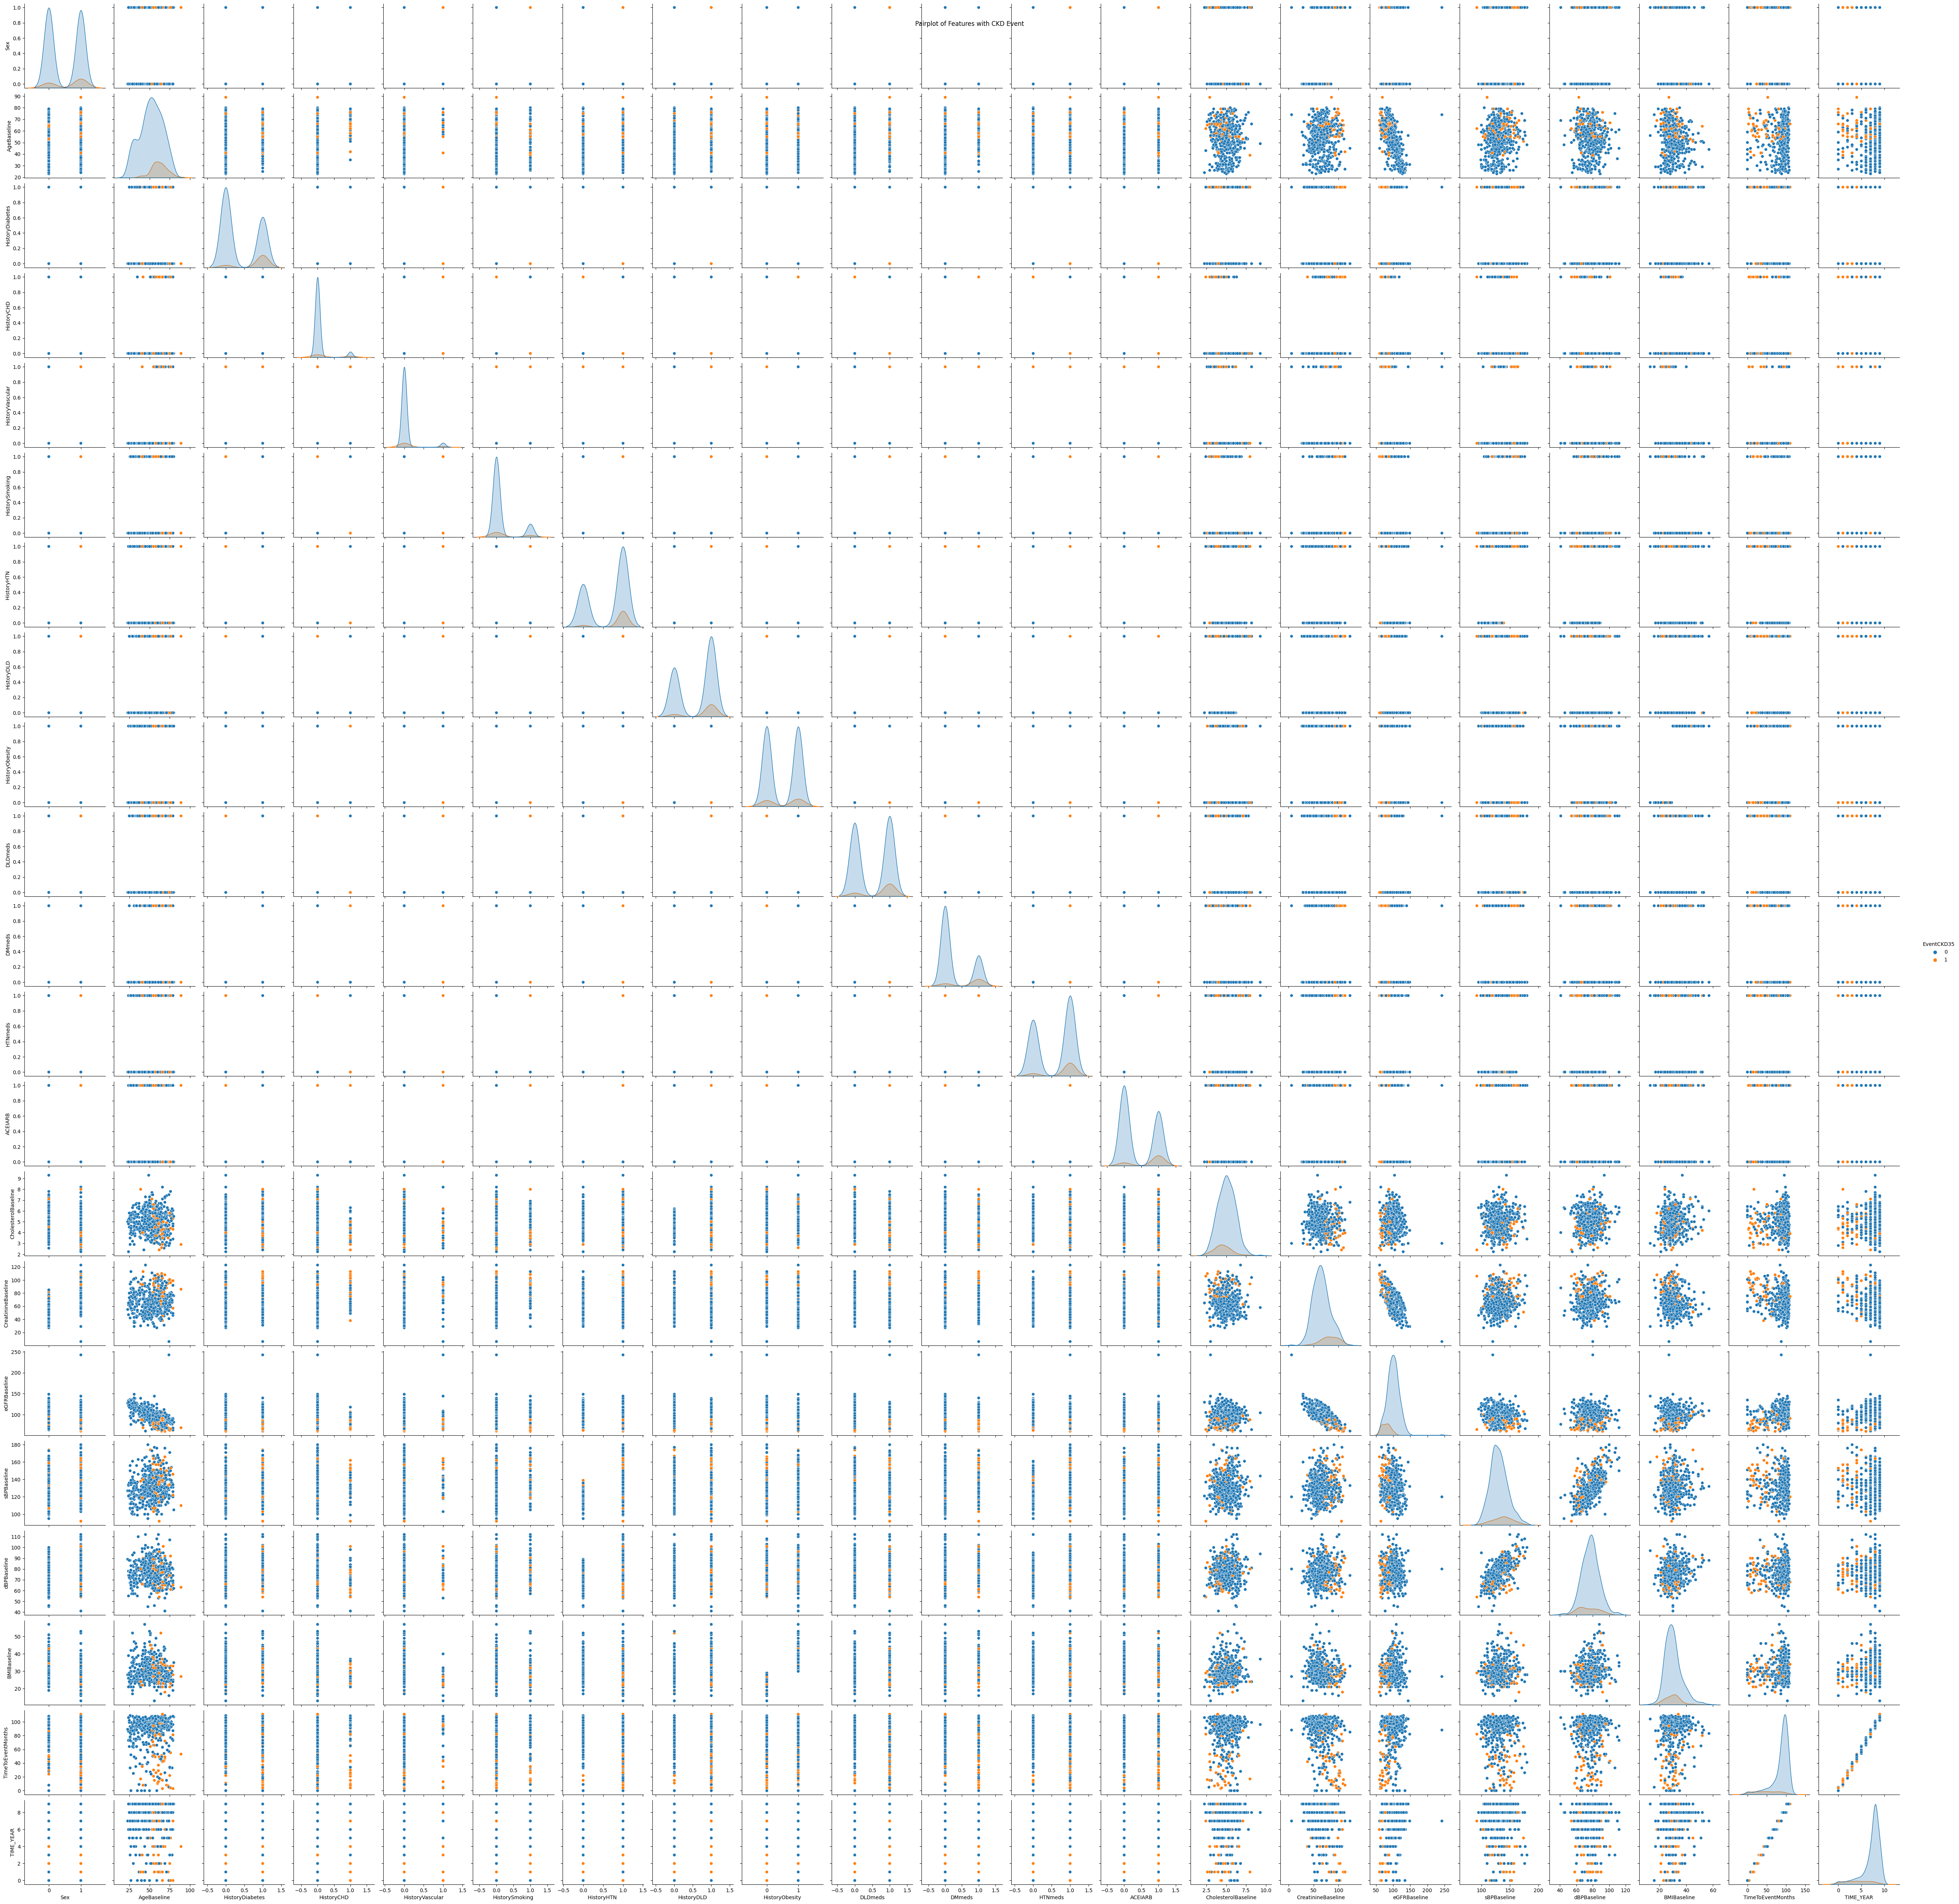

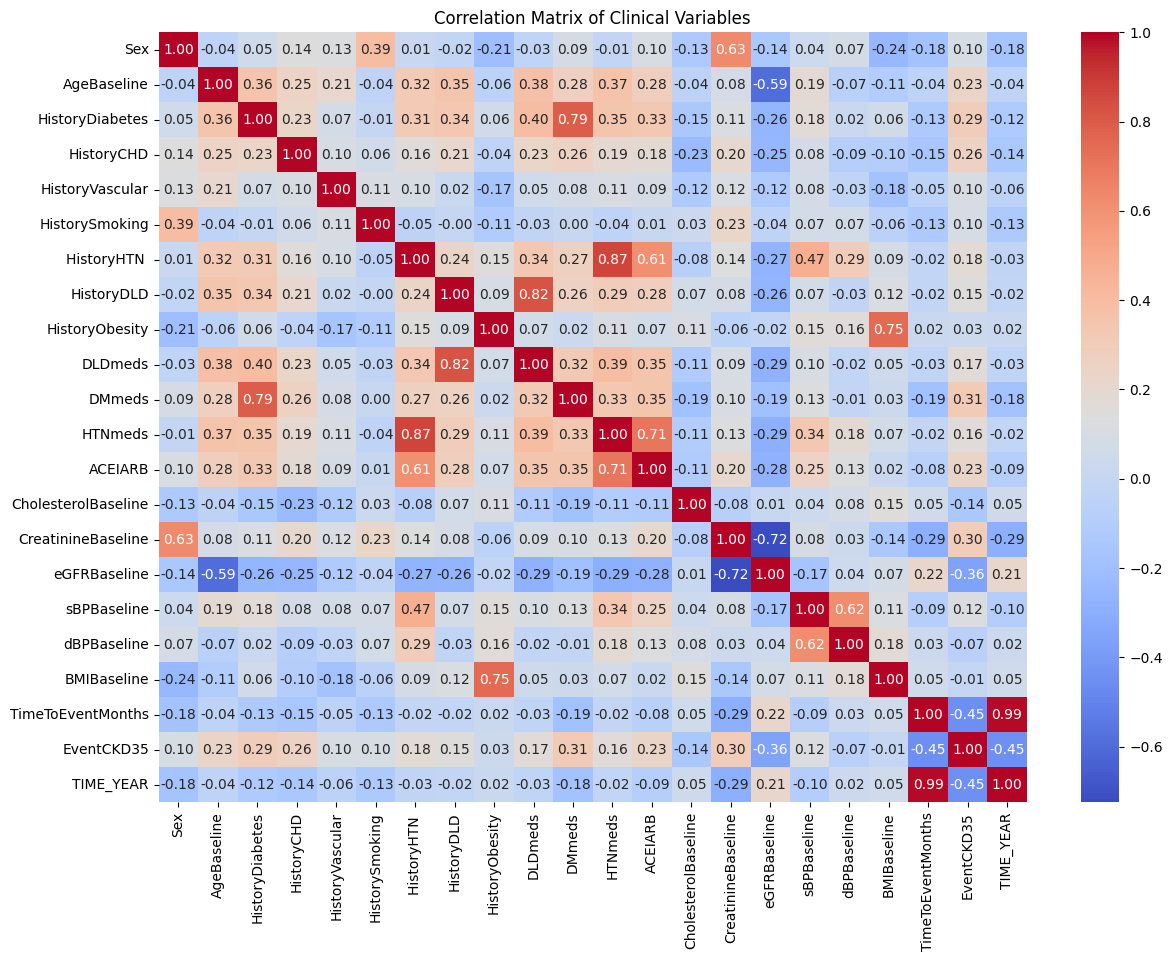

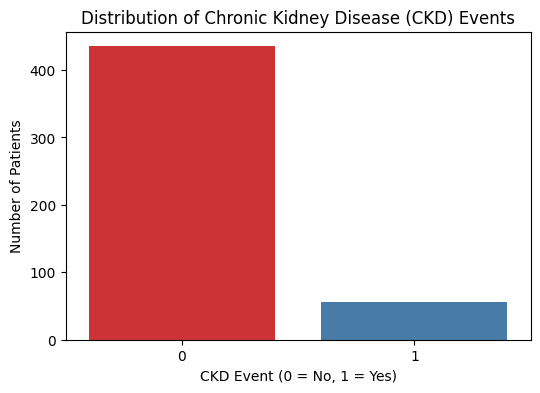

Logistic Regression - Accuracy: 0.8990, AUC-ROC: 0.8448
Random Forest - Accuracy: 0.8990, AUC-ROC: 0.8295
Gradient Boosting - Accuracy: 0.8586, AUC-ROC: 0.7337
K-Nearest Neighbors - Accuracy: 0.8283, AUC-ROC: 0.7730
Support Vector Machine - Accuracy: 0.8081, AUC-ROC: 0.8879
Neural Network - Accuracy: 0.8889, AUC-ROC: 0.7519

Model Performance Comparison:
                         Accuracy   AUC-ROC
Support Vector Machine  0.808081  0.887931
Logistic Regression     0.898990  0.844828
Random Forest           0.898990  0.829502
K-Nearest Neighbors     0.828283  0.772989
Neural Network          0.888889  0.751916
Gradient Boosting       0.858586  0.733716


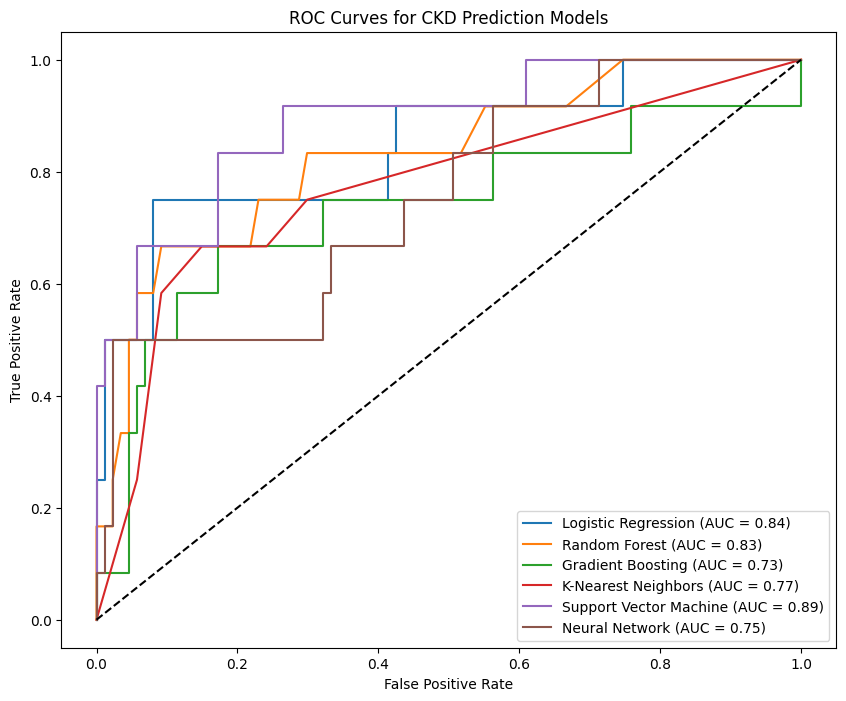

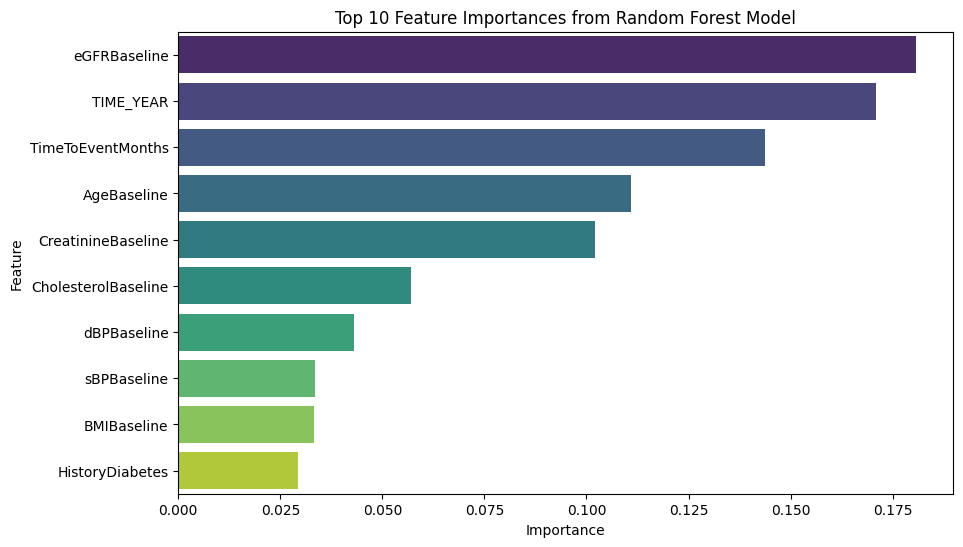

Classification Report for Support Vector Machine:
               precision    recall  f1-score   support

           0       0.97      0.80      0.88        87
           1       0.37      0.83      0.51        12

    accuracy                           0.81        99
   macro avg       0.67      0.82      0.70        99
weighted avg       0.90      0.81      0.84        99



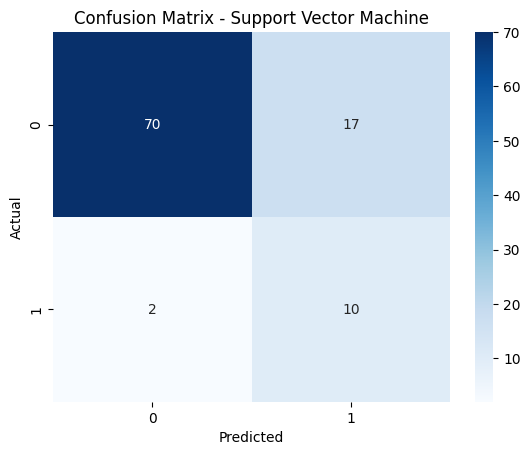

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load the dataset from the Kaggle input directory
file_path = "/kaggle/input/chronic-kidney-disease-ehrs-abu-dhabi/ChronicKidneyDisease_EHRs_from_AbuDhabi.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("First few rows of the dataset:\n", df.head())
print("Data types:\n", df.dtypes)

# Check for missing values
print("Missing values in the dataset:\n", df.isnull().sum())

# Exploratory Data Analysis (EDA)
# Distribution of numerical features
df.hist(bins=20, figsize=(20, 15))
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Box plots for numerical features to check for outliers
plt.figure(figsize=(15,10))
sns.boxplot(data=df)
plt.title("Box Plots of Numerical Features")
plt.xticks(rotation=90)
plt.show()

# Pairplot to visualize relationships between features
sns.pairplot(df, hue='EventCKD35', diag_kind='kde')
plt.suptitle("Pairplot of Features with CKD Event")
plt.show()

# Correlation matrix with more details
plt.figure(figsize=(14,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Clinical Variables")
plt.show()

# Distribution of CKD events in the dataset
plt.figure(figsize=(6,4))
sns.countplot(x='EventCKD35', data=df, palette='Set1')
plt.title('Distribution of Chronic Kidney Disease (CKD) Events')
plt.xlabel('CKD Event (0 = No, 1 = Yes)')
plt.ylabel('Number of Patients')
plt.show()

# Data Preprocessing
X = df.drop('EventCKD35', axis=1)  # Features
y = df['EventCKD35']  # Target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Addressing Class Imbalance
# Using SMOTE (Synthetic Minority Over-sampling Technique) to oversample the minority class in the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)  # Apply scaling after SMOTE
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
}

# Train and evaluate each model
model_results = {}
for name, model in models.items():
    if name in ['Logistic Regression', 'Neural Network']:
        model.fit(X_train_scaled, y_train_smote)
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train_smote, y_train_smote)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    model_results[name] = {'Accuracy': accuracy, 'AUC-ROC': auc}
    
    print(f"{name} - Accuracy: {accuracy:.4f}, AUC-ROC: {auc:.4f}")
    
# Compare model performance
results_df = pd.DataFrame(model_results).T.sort_values(by='AUC-ROC', ascending=False)
print("\nModel Performance Comparison:\n", results_df)

# Plot ROC Curves for all models
plt.figure(figsize=(10,8))
for name, model in models.items():
    if name in ['Logistic Regression', 'Neural Network']:
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_prob = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})')

plt.plot([0,1], [0,1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for CKD Prediction Models')
plt.legend(loc='lower right')
plt.show()

# Feature Importance (Random Forest)
feature_importances = models['Random Forest'].feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting top 10 feature importances
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances from Random Forest Model')
plt.show()

# Classification Report for the best model (based on AUC-ROC)
best_model_name = results_df.index[0]
best_model = models[best_model_name]
if best_model_name in ['Logistic Regression', 'Neural Network']:
    y_pred_best = best_model.predict(X_test_scaled)
else:
    y_pred_best = best_model.predict(X_test)
print(f"Classification Report for {best_model_name}:\n", classification_report(y_test, y_pred_best))

# Confusion Matrix for the best model
cm_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load the dataset from the Kaggle input directory
file_path = "/kaggle/input/chronic-kidney-disease-ehrs-abu-dhabi/ChronicKidneyDisease_EHRs_from_AbuDhabi.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("First few rows of the dataset:\n", df.head())

# Data Preprocessing
X = df.drop('EventCKD35', axis=1)  # Features
y = df['EventCKD35']  # Target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of oversampling techniques to be used
oversampling_methods = {
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'Random Over-sampler': RandomOverSampler(random_state=42)
}

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
}

# Iterate over each oversampling method and evaluate models
for method_name, method in oversampling_methods.items():
    print(f"\nOversampling Method: {method_name}")
    
    # Apply the oversampling method
    X_train_resampled, y_train_resampled = method.fit_resample(X_train, y_train)
    
    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_test)
    
    # Train and evaluate models
    for model_name, model in models.items():
        if model_name in ['Logistic Regression', 'Neural Network']:
            model.fit(X_train_scaled, y_train_resampled)
            y_pred = model.predict(X_test_scaled)
            y_prob = model.predict_proba(X_test_scaled)[:, 1]
        else:
            model.fit(X_train_resampled, y_train_resampled)
            y_pred = model.predict(X_test)
            y_prob = model.predict_proba(X_test)[:, 1]
        
        # Print classification report for each model
        print(f"\nClassification Report for {model_name} with {method_name}:")
        print(classification_report(y_test, y_pred))
        
        # Print accuracy and AUC-ROC for each model
        accuracy = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)
        print(f"{model_name} - Accuracy: {accuracy:.4f}, AUC-ROC: {auc:.4f}")


/kaggle/input/chronic-kidney-disease-ehrs-abu-dhabi/ChronicKidneyDisease_EHRs_from_AbuDhabi.csv
Dataset shape: (491, 22)
First few rows of the dataset:
    Sex  AgeBaseline  HistoryDiabetes  HistoryCHD  HistoryVascular  \
0    0           64                0           0                0   
1    0           52                0           0                0   
2    0           56                0           0                0   
3    0           58                0           0                0   
4    0           63                1           0                0   

   HistorySmoking  HistoryHTN   HistoryDLD  HistoryObesity  DLDmeds  ...  \
0               0            1           1               1        1  ...   
1               0            1           1               1        0  ...   
2               0            1           1               1        1  ...   
3               0            0           1               1        1  ...   
4               0            1           1          

In [5]:


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

# Load the dataset
file_path = "/kaggle/input/chronic-kidney-disease-ehrs-abu-dhabi/ChronicKidneyDisease_EHRs_from_AbuDhabi.csv"
df = pd.read_csv(file_path)

# Data Preprocessing
X = df.drop('EventCKD35', axis=1)  # Features
y = df['EventCKD35']  # Target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of oversampling techniques to be used
oversampling_methods = {
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'Random Over-sampler': RandomOverSampler(random_state=42)
}

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
}

# Iterate over each oversampling method and evaluate models
for method_name, method in oversampling_methods.items():
    print(f"\nOversampling Method: {method_name}")
    
    # Apply the oversampling method to the training set
    X_train_resampled, y_train_resampled = method.fit_resample(X_train, y_train)
    
    # Apply the oversampling method to the test set
    X_test_resampled, y_test_resampled = method.fit_resample(X_test, y_test)
    
    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_test_resampled)
    
    # Train and evaluate models
    for model_name, model in models.items():
        if model_name in ['Logistic Regression', 'Neural Network']:
            model.fit(X_train_scaled, y_train_resampled)
            y_pred = model.predict(X_test_scaled)
            y_prob = model.predict_proba(X_test_scaled)[:, 1]
        else:
            model.fit(X_train_resampled, y_train_resampled)
            y_pred = model.predict(X_test_resampled)
            y_prob = model.predict_proba(X_test_resampled)[:, 1]
        
        # Print classification report for each model
        print(f"\nClassification Report for {model_name} with {method_name} on Balanced Test Set:")
        print(classification_report(y_test_resampled, y_pred))
        
        # Print accuracy and AUC-ROC for each model
        accuracy = accuracy_score(y_test_resampled, y_pred)
        auc = roc_auc_score(y_test_resampled, y_prob)
        print(f"{model_name} - Accuracy: {accuracy:.4f}, AUC-ROC: {auc:.4f}")

# Optionally, you can visualize the confusion matrix and ROC curve for the best model



Oversampling Method: SMOTE

Classification Report for Logistic Regression with SMOTE on Balanced Test Set:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        87
           1       0.91      0.85      0.88        87

    accuracy                           0.89       174
   macro avg       0.89      0.89      0.88       174
weighted avg       0.89      0.89      0.88       174

Logistic Regression - Accuracy: 0.8851, AUC-ROC: 0.9277

Classification Report for Random Forest with SMOTE on Balanced Test Set:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        87
           1       0.93      0.78      0.85        87

    accuracy                           0.86       174
   macro avg       0.87      0.86      0.86       174
weighted avg       0.87      0.86      0.86       174

Random Forest - Accuracy: 0.8621, AUC-ROC: 0.9369

Classification Report for Gradient Boosting with SMOTE on